In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data_prep import apply_mappings, split_features, plot_graphs

from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv('train.csv')

In [6]:
train

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [230]:
train = split_features(apply_mappings(train))

train.drop(columns = ['id'], inplace = True)

X, y = train.drop(columns = ['Personality']), train['Personality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [63]:
train.isna().sum(axis=1).value_counts()

0    10189
1     7516
2      779
3       38
4        2
Name: count, dtype: int64

In [64]:
train['Personality'].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [69]:
train.dtypes

id                             int64
Time_spent_Alone             float64
Stage_fear                   float64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing    float64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dtype: object

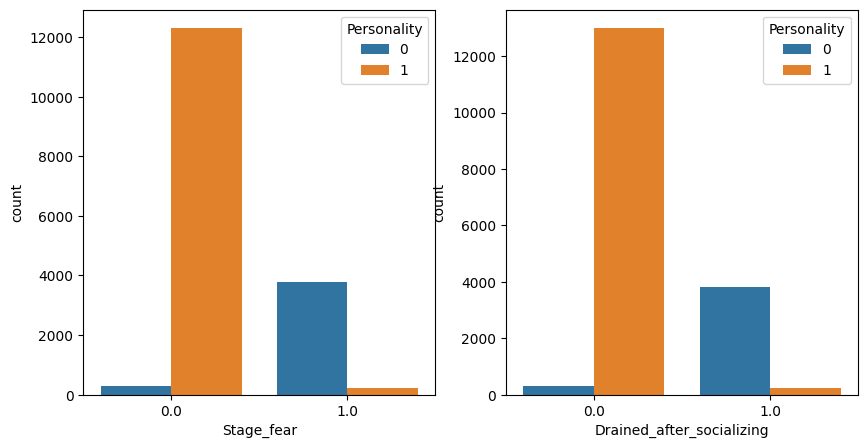

In [70]:
fix, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'Stage_fear', data = train, hue = 'Personality', ax = ax[0])

sns.countplot(x = 'Drained_after_socializing', data = train, hue = 'Personality', ax = ax[1])

plt.show()

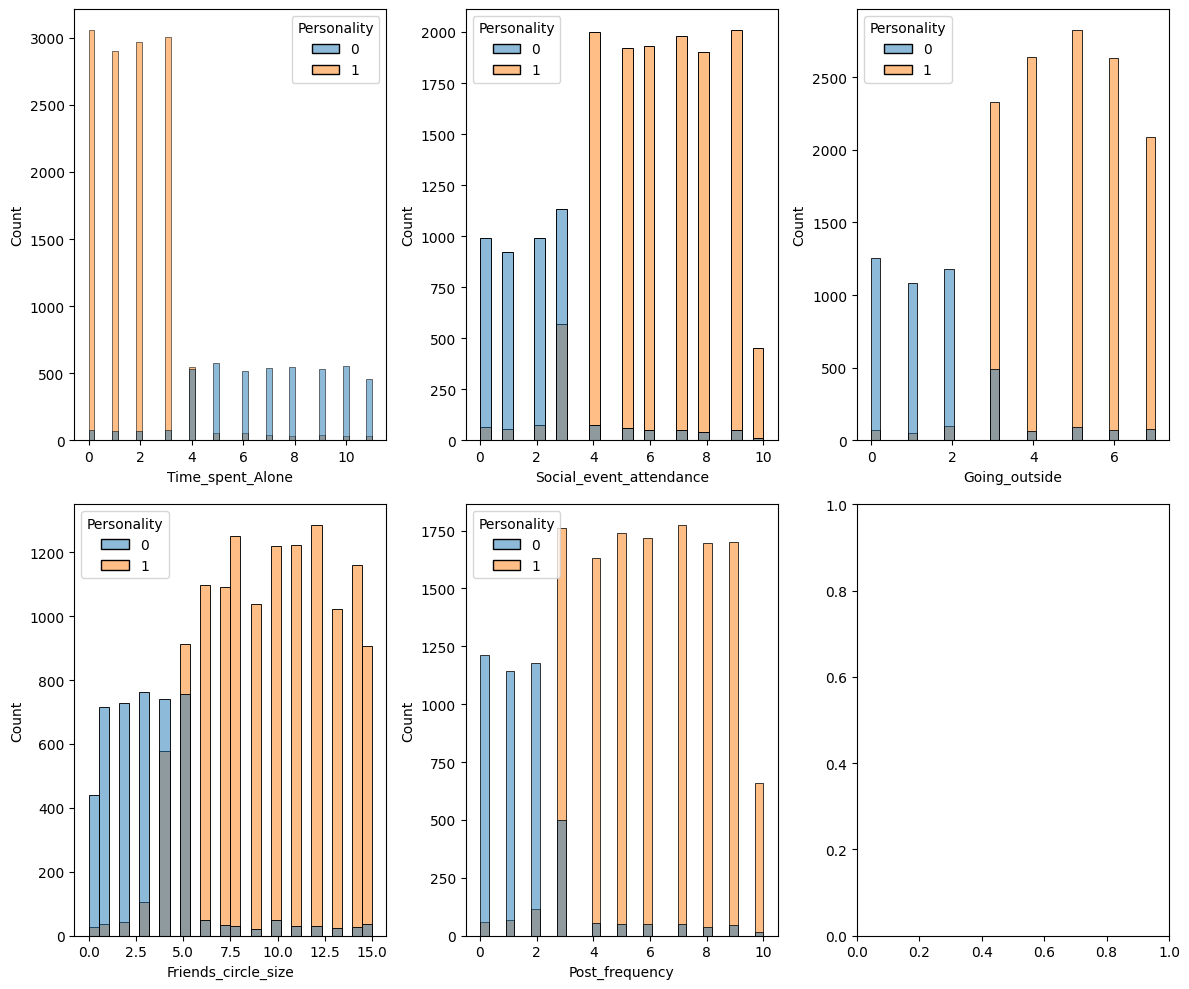

In [71]:
fig, axs = plt.subplots(2,3, figsize = (12,10))

for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):

    ax = axs.flat[i]
    sns.histplot(data = train, x = col, hue = 'Personality', ax = ax)

plt.tight_layout()



In [265]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.005],
    'max_depth': [2],
    'subsample': [0.9],
    'colsample_bytree': [0.8]
}

model = XGBClassifier()

estimator = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [281]:
model = XGBClassifier(n_estimators = 80, learning_rate = 0.05, max_depth = 3, subsample = 1.0, colsample_bytree = 0.8)

In [ ]:
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [248]:
estimator.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [287]:
#best_model = estimator.best_estimator_

y_pred = model.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3873
           1       0.98      0.98      0.98     10946

    accuracy                           0.97     14819
   macro avg       0.96      0.96      0.96     14819
weighted avg       0.97      0.97      0.97     14819



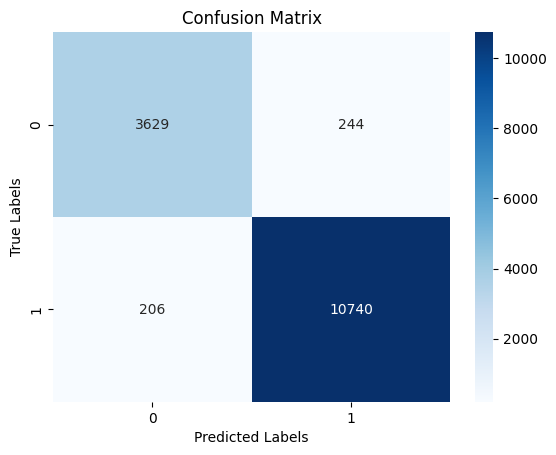

In [288]:
cm = confusion_matrix(y_train, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


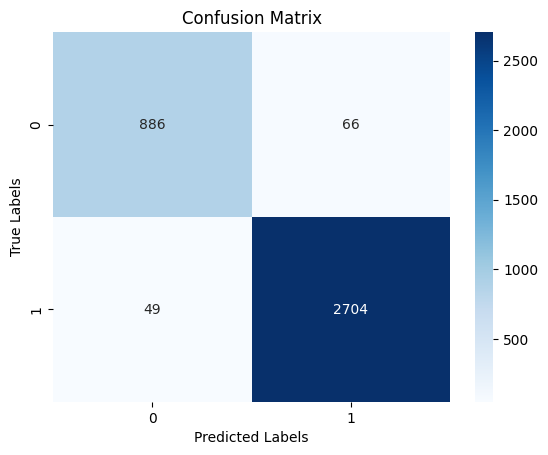

In [238]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [262]:
y_test

13209    1
2740     1
10249    1
7608     1
10528    1
        ..
3269     1
15214    0
1127     1
11368    1
17737    1
Name: Personality, Length: 3705, dtype: int64

In [292]:


# Filter x_test to show only incorrect predictions (false positives + false negatives)
incorrect_mask = y_train != y_pred
x_test_incorrect = x_train[incorrect_mask]

print(f"Total test samples: {len(x_test)}")
print(f"Incorrect predictions: {len(x_test_incorrect)}")
print(f"Accuracy: {(len(x_test) - len(x_test_incorrect)) / len(x_test):.4f}")

# Show the incorrect predictions
x_test_incorrect['Personality'] = y_train

Total test samples: 3705
Incorrect predictions: 450
Accuracy: 0.8785


C:\Users\olive\AppData\Local\Temp\ipykernel_53804\289998104.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_incorrect['Personality'] = y_train


In [298]:
narrow = x_test_incorrect[x_test_incorrect['Time_spent_Alone'] == 0]

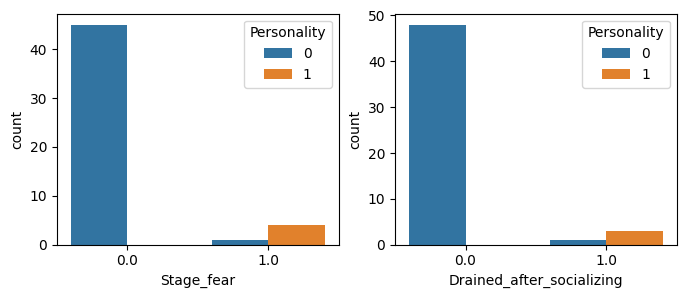

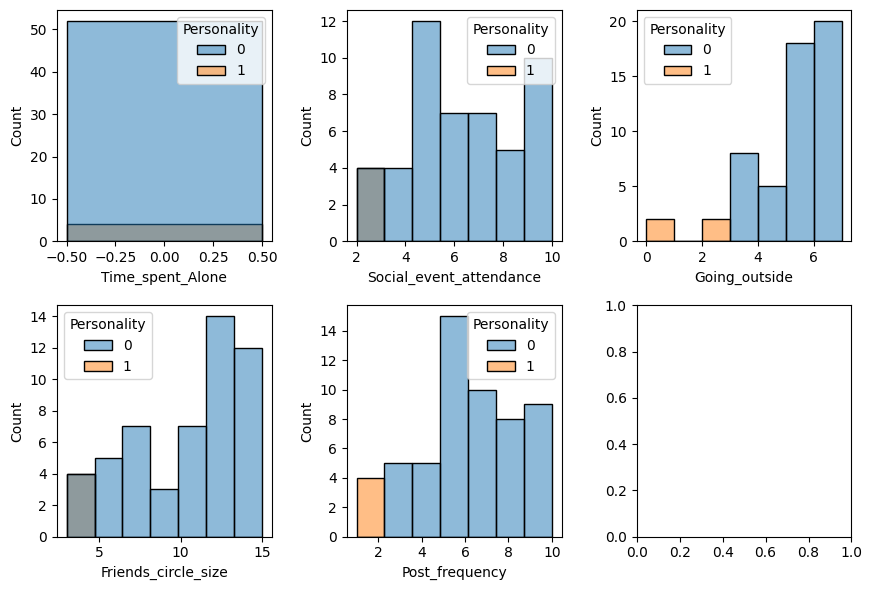

In [299]:
plot_graphs(narrow)

# More training, include original data

In [130]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

100%|██████████| 30.5k/30.5k [00:00<00:00, 2.67MB/s]

Extracting files...
Path to dataset files: C:\Users\olive\.cache\kagglehub\datasets\rakeshkapilavai\extrovert-vs-introvert-behavior-data\versions\2


In [215]:
personality_dataset = pd.read_csv('C:/Users/olive/.cache/kagglehub/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/versions/2/personality_dataset.csv')

personality_dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
Extracting files...
Path to dataset files: C:\Users\olive\.cache\kagglehub\datasets\rakeshkapilavai\extrovert-vs-introvert-behavior-data\versions\2

In [135]:
personality_dataset_prepped = split_features(apply_mappings(personality_dataset))

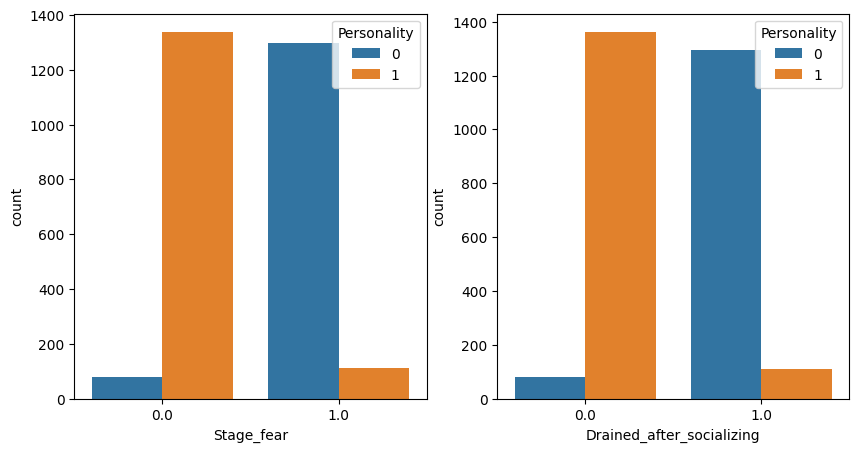

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'Stage_fear', data = personality_dataset_prepped, hue = 'Personality', ax = ax[0])

sns.countplot(x = 'Drained_after_socializing', data = personality_dataset_prepped, hue = 'Personality', ax = ax[1])

plt.show()

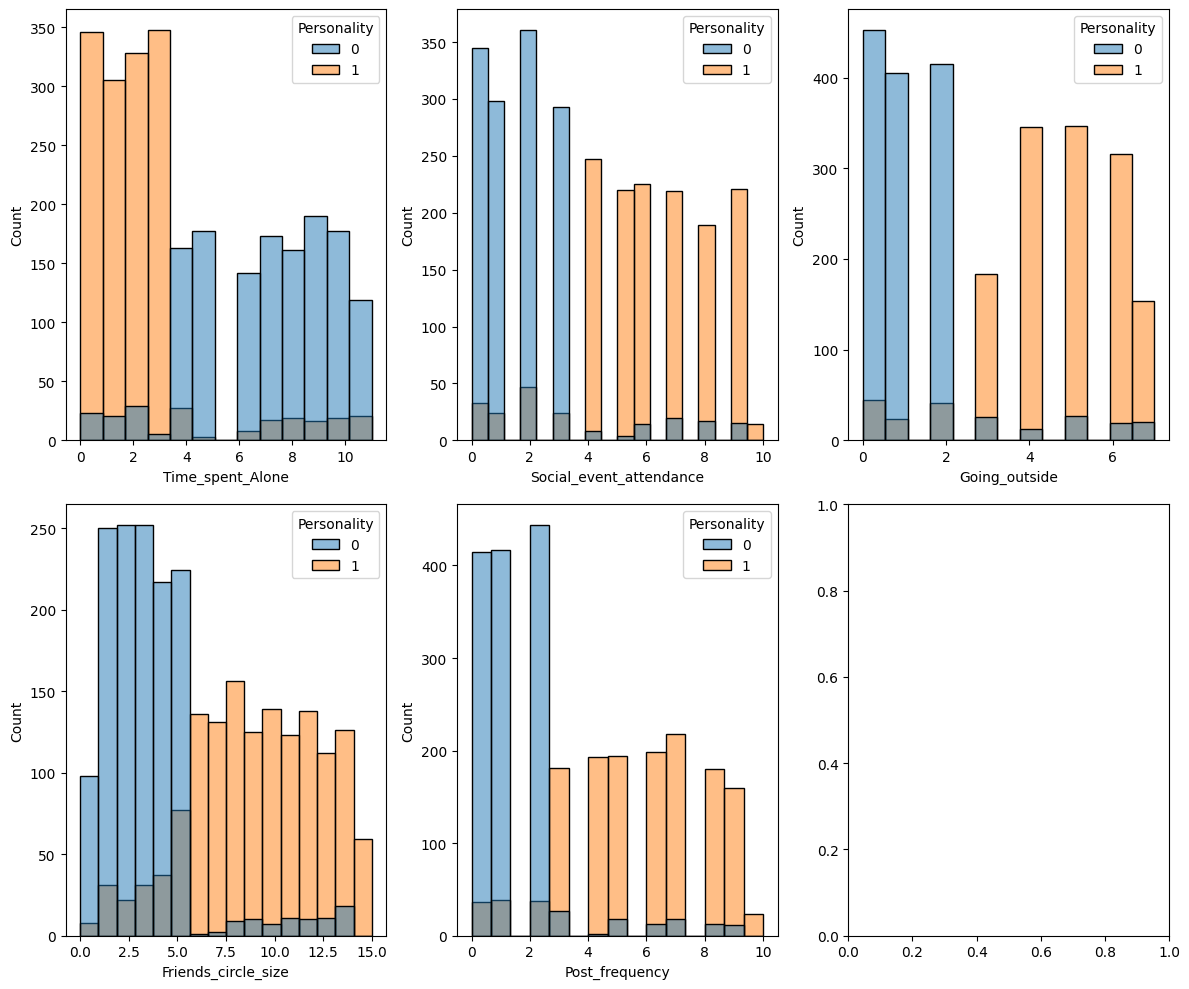

In [ ]:

fig, axs = plt.subplots(2,3, figsize = (12,10))

for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):

    ax = axs.flat[i]
    sns.histplot(data = personality_dataset_prepped, x = col, hue = 'Personality', ax = ax)

plt.tight_layout()



## distributions are identical, we will add the data so we now have more training data

In [180]:

combined_df = pd.concat([train, personality_dataset_prepped], ignore_index=True)


In [201]:
X, y = train.drop(columns = ['Personality']), train['Personality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.005,0.01],
    'max_depth': [4, 5],
    'subsample': [0.8, 0.75],
    'colsample_bytree': [0.9]
}

model = XGBClassifier()

estimator = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [202]:
estimator.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9],
                         'learning_rate': [0.005, 0.01], 'max_depth': [4, 5],
                         'n_estimators': [300], 'subsample': [0.8, 0.75]},
             scoring='accuracy', verbose=1)

In [184]:
estimator.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.75}

In [203]:
best_model_1 = estimator.best_estimator_

y_pred = best_model_1.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       497
           1       0.97      0.98      0.98      1356

    accuracy                           0.97      1853
   macro avg       0.97      0.96      0.96      1853
weighted avg       0.97      0.97      0.97      1853



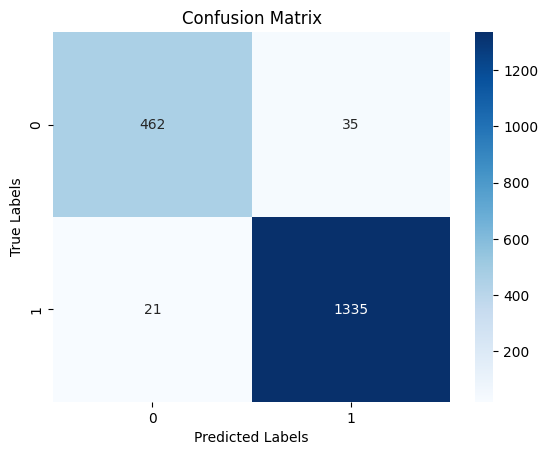

In [204]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


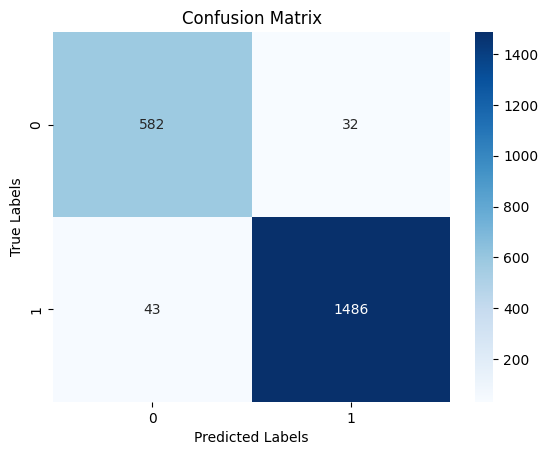

In [169]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# submission

In [206]:
test = pd.read_csv('test.csv')

In [207]:
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [208]:
test2 = apply_mappings(test, istest = True)
test3 = split_features(test2)

In [209]:
test3

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_Alone_greater3,Social_event_attendance_greater3,Going_outside_greater3,Friends_circle_size_greater5,Post_frequency_greater2
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN,False,True,True,True,False
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0,False,False,False,True,False
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0,False,True,True,True,True
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0,False,True,True,True,True
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,24694,3.0,0.0,5.0,5.0,0.0,9.0,6.0,False,True,True,True,True
6171,24695,8.0,1.0,2.0,1.0,1.0,0.0,0.0,True,False,False,False,False
6172,24696,2.0,0.0,4.0,3.0,0.0,9.0,7.0,False,True,False,True,True
6173,24697,3.0,0.0,4.0,4.0,0.0,11.0,9.0,False,True,True,True,True


In [210]:
id_col = test3['id'].copy()
df_test = test3.drop(columns=['id'])


In [211]:
y_pred_test_new = best_model_1.predict(df_test)

In [214]:
(y_pred_test == y_pred_test_new).astype(int).mean()

np.float64(0.9998380566801619)

In [196]:
submission_extra_data = pd.DataFrame({
    'id': id_col,
    'Personality': y_pred_test
})

submission_extra_data['Personality'] = submission_extra_data['Personality'].map({1: 'Extrovert', 0: 'Introvert'})

submission_extra_data.to_csv('submission_extra_data.csv', index=False)

submission_extra_data.head()


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [197]:
submission_extra_data

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [198]:
df_test['Personality'] = y_pred_test

In [294]:
# Get training predictions to see which training samples were predicted incorrectly
y_train_pred = best_model_2.predict(x_train)

# Find incorrect training predictions
train_incorrect_mask = y_train != y_train_pred
x_train_incorrect = x_train[train_incorrect_mask]
y_train_incorrect_actual = y_train[train_incorrect_mask]
y_train_incorrect_pred = y_train_pred[train_incorrect_mask]

print(f"Total training samples: {len(x_train)}")
print(f"Incorrect training predictions: {len(x_train_incorrect)}")
print(f"Training accuracy: {(len(x_train) - len(x_train_incorrect)) / len(x_train):.4f}")

print(f"\nTraining Error Rate: {len(x_train_incorrect) / len(x_train):.4f}")

# Show the incorrectly predicted training samples
x_train_incorrect


Total training samples: 14819
Incorrect training predictions: 439
Training accuracy: 0.9704

Training Error Rate: 0.0296


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_Alone_greater3,Social_event_attendance_greater3,Going_outside_greater3,Friends_circle_size_greater5,Post_frequency_greater2
1430,1.0,0.0,4.0,5.0,0.0,10.0,7.0,False,True,True,True,True
13172,NaN,0.0,10.0,6.0,0.0,15.0,8.0,False,True,True,True,True
15537,9.0,1.0,5.0,3.0,1.0,5.0,3.0,True,True,False,True,True
1729,4.0,0.0,4.0,7.0,0.0,10.0,7.0,True,True,True,True,True
3657,NaN,0.0,7.0,6.0,0.0,15.0,10.0,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7455,3.0,0.0,NaN,6.0,0.0,12.0,5.0,False,False,True,True,True
3863,1.0,0.0,6.0,4.0,0.0,3.0,7.0,False,True,True,False,True
16371,3.0,0.0,5.0,7.0,0.0,6.0,7.0,False,True,True,True,True
12666,3.0,0.0,9.0,6.0,0.0,4.0,9.0,False,True,True,False,True


Training False Positives: 240
Training False Negatives: 199

First 10 incorrect training predictions:
Sample 0: Actual=0, Predicted=1 (False Positive)
Sample 1: Actual=0, Predicted=1 (False Positive)
Sample 2: Actual=1, Predicted=0 (False Negative)
Sample 3: Actual=0, Predicted=1 (False Positive)
Sample 4: Actual=0, Predicted=1 (False Positive)
Sample 5: Actual=0, Predicted=1 (False Positive)
Sample 6: Actual=0, Predicted=1 (False Positive)
Sample 7: Actual=1, Predicted=0 (False Negative)
Sample 8: Actual=0, Predicted=1 (False Positive)
Sample 9: Actual=1, Predicted=0 (False Negative)

Training Confusion Matrix:
True Negatives (Introvert->Introvert): 3633
False Positives (Introvert->Extrovert): 240
False Negatives (Extrovert->Introvert): 199
True Positives (Extrovert->Extrovert): 10747


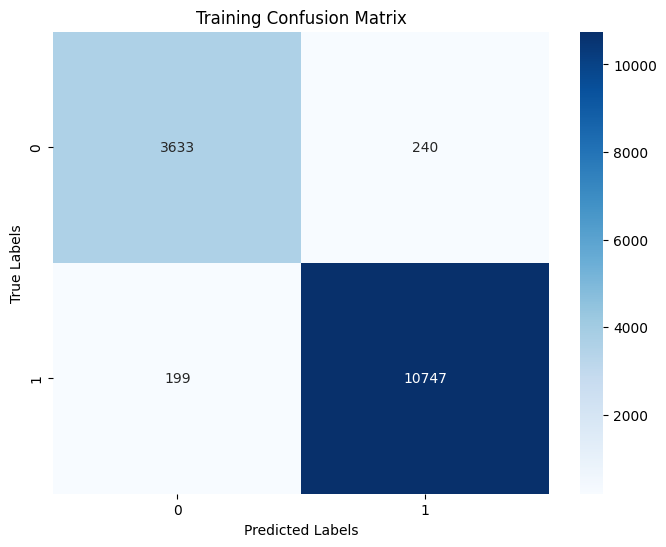

In [296]:
# Break down training errors by type

# False Positives in training: predicted 1 (Extrovert), actual 0 (Introvert)
train_fp_mask = (y_train_pred == 1) & (y_train == 0)
x_train_false_positives = x_train[train_fp_mask]

# False Negatives in training: predicted 0 (Introvert), actual 1 (Extrovert)
train_fn_mask = (y_train_pred == 0) & (y_train == 1)
x_train_false_negatives = x_train[train_fn_mask]

print(f"Training False Positives: {len(x_train_false_positives)}")
print(f"Training False Negatives: {len(x_train_false_negatives)}")

# Show first few incorrect training predictions with details
print(f"\nFirst 10 incorrect training predictions:")
for i, (actual, predicted) in enumerate(zip(y_train_incorrect_actual[:10], y_train_incorrect_pred[:10])):
    error_type = "False Positive" if (predicted == 1 and actual == 0) else "False Negative"
    print(f"Sample {i}: Actual={actual}, Predicted={predicted} ({error_type})")

# Create confusion matrix for training data
from sklearn.metrics import confusion_matrix
train_cm = confusion_matrix(y_train, y_train_pred)

print(f"\nTraining Confusion Matrix:")
print(f"True Negatives (Introvert->Introvert): {train_cm[0,0]}")
print(f"False Positives (Introvert->Extrovert): {train_cm[0,1]}")
print(f"False Negatives (Extrovert->Introvert): {train_cm[1,0]}")
print(f"True Positives (Extrovert->Extrovert): {train_cm[1,1]}")

# Visualize training confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Training Confusion Matrix')
plt.show()


In [297]:
x_train_false_positives

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_Alone_greater3,Social_event_attendance_greater3,Going_outside_greater3,Friends_circle_size_greater5,Post_frequency_greater2
1430,1.0,0.0,4.0,5.0,0.0,10.0,7.0,False,True,True,True,True
13172,NaN,0.0,10.0,6.0,0.0,15.0,8.0,False,True,True,True,True
1729,4.0,0.0,4.0,7.0,0.0,10.0,7.0,True,True,True,True,True
3657,NaN,0.0,7.0,6.0,0.0,15.0,10.0,False,True,True,True,True
12428,0.0,0.0,5.0,5.0,0.0,12.0,4.0,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7455,3.0,0.0,NaN,6.0,0.0,12.0,5.0,False,False,True,True,True
3863,1.0,0.0,6.0,4.0,0.0,3.0,7.0,False,True,True,False,True
16371,3.0,0.0,5.0,7.0,0.0,6.0,7.0,False,True,True,True,True
12666,3.0,0.0,9.0,6.0,0.0,4.0,9.0,False,True,True,False,True
